In [1]:
import pandas as pd
from datetime import datetime

# Read the CSV file
df = pd.read_csv('C:\\Users\\37424\\Desktop\\fake_transactional_data_24.csv')
unique_users = df['from_totally_fake_account'].nunique()
unique_merchants = df['to_randomly_generated_account'].nunique()
print(f'User: {unique_users}')
print(f'Merchants: {unique_merchants}')

C:\Users\37424\AppData\Local\Temp\ipykernel_13788\559528165.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


User: 8142
Merchants: 14300


In [2]:
df['from_totally_fake_account'] = df['from_totally_fake_account'].astype(int)
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='%d/%m/%Y')

In [3]:
grouped = df.groupby('from_totally_fake_account')
sorted_users = [group.sort_values('not_happened_yet_date') for _, group in grouped]
sorted_df = pd.concat(sorted_users)
aa = sorted_df['from_totally_fake_account'].count()
print(aa)
print(sorted_df.head(10).to_string(index=False))
sorted_df.to_csv('users_sorted_dataframe.csv', index=False)

10148280
 from_totally_fake_account  monopoly_money_amount to_randomly_generated_account not_happened_yet_date
                      1000                   8.99             STREAMING_SERVICE            2025-01-01
                      1000                   2.40           GOURMET_COFFEE_SHOP            2025-01-01
                      1000                   2.55           GOURMET_COFFEE_SHOP            2025-01-01
                      1000                   2.20           A_LOCAL_COFFEE_SHOP            2025-01-01
                      1000                  13.06                     LOCAL_PUB            2025-01-01
                      1000                   4.50                          CAFE            2025-01-02
                      1000                   2.45           HIPSTER_COFFEE_SHOP            2025-01-02
                      1000                   2.20           GOURMET_COFFEE_SHOP            2025-01-02
                      1000                   2.65       PRETENTIOUS_COFFE

In [4]:
df['month'] = df['not_happened_yet_date'].dt.month
monthly_expenses = df.groupby(['from_totally_fake_account', 'month'])['monopoly_money_amount'].sum().reset_index()

monthly_expenses.rename(columns={'monopoly_money_amount': 'total_monthly_spent'}, inplace=True)

print(monthly_expenses.head(10).to_string(index=False))
monthly_expenses.to_csv('monthly_expenses.csv', index=False)

 from_totally_fake_account  month  total_monthly_spent
                      1000      1              2576.52
                      1000      2              2882.33
                      1000      3              2341.74
                      1000      4              1876.77
                      1000      5              1843.29
                      1000      6              2553.40
                      1000      7              2949.72
                      1000      8              2503.66
                      1000      9              2173.79
                      1000     10              2502.73


In [5]:
df['year'] = df['not_happened_yet_date'].dt.year
year_expenses = df.groupby(['from_totally_fake_account', 'year'])['monopoly_money_amount'].sum().reset_index()

year_expenses.rename(columns={'monopoly_money_amount': 'total_year_spent'}, inplace=True)

print(year_expenses.head(10).to_string(index=False))
year_expenses.to_csv('year_expenses.csv', index=False)

 from_totally_fake_account  year  total_year_spent
                      1000  2025          28698.51
                      1002  2025          15622.97
                      1006  2025          18778.19
                      1018  2025          15612.21
                      1053  2025          19444.57
                      1059  2025          17491.45
                      1071  2025          13505.42
                      1078  2025          14967.27
                      1086  2025          20213.62
                      1087  2025          15920.14


In [6]:
grouped = df.groupby('to_randomly_generated_account')
sorted_merchants = [group.sort_values('not_happened_yet_date') for _, group in grouped]
sorted_df2 = pd.concat(sorted_merchants)
print(sorted_df2.head(10).to_string(index=False))

 from_totally_fake_account  monopoly_money_amount to_randomly_generated_account not_happened_yet_date  month  year
                      5403                   6.00                          1000            2025-01-04      1  2025
                      5403                   6.00                          1000            2025-01-04      1  2025
                      5403                   6.00                          1000            2025-01-04      1  2025
                     77084                   4.50                          1000            2025-01-05      1  2025
                     77084                   4.50                          1000            2025-01-05      1  2025
                     77084                 334.00                          1000            2025-01-07      1  2025
                     56140                 334.00                          1000            2025-01-07      1  2025
                     41718                   5.50                          1000 

In [7]:
columns = list(df.columns)
columns.remove('to_randomly_generated_account')
new_columns_order = ['to_randomly_generated_account'] + columns
df = df[new_columns_order]
df_filtered = df[~df['to_randomly_generated_account'].str.isdigit()]
# print(df_filtered.head(1000).to_string(index=False))
grouped = df_filtered.groupby('to_randomly_generated_account')
sorted_merchants = [group.sort_values('not_happened_yet_date') for _, group in grouped]
sorted_df2 = pd.concat(sorted_merchants)
aa = sorted_df2['from_totally_fake_account'].count()
print(f'Records: {aa}')
unique_merchants = sorted_df['to_randomly_generated_account'].nunique()
print(f'Merchants: {unique_merchants}')
print(sorted_df2.head(10).to_string(index=False))
sorted_df2.to_csv('merchants_sorted_dataframe.csv', index=False)

Records: 7615517
Merchants: 14300
to_randomly_generated_account  from_totally_fake_account  monopoly_money_amount not_happened_yet_date  month  year
               ACCESSORY_SHOP                      95445                   18.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      10179                   14.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      63705                   18.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      79889                   39.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      52591                   39.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      26805                   12.0            2025-01-01      1  2025
               ACCESSORY_SHOP                      19533                   29.0            2025-01-02      1  2025
               ACCESSORY_SHOP                 

In [8]:
sorted_df2['month'] = sorted_df2['not_happened_yet_date'].dt.month
monthly_incomes = sorted_df2.groupby(['to_randomly_generated_account', 'month'])['monopoly_money_amount'].sum().reset_index()

monthly_incomes.rename(columns={'monopoly_money_amount': 'total_monthly_income'}, inplace=True)
print(monthly_incomes.head(10).to_string(index=False))
monthly_incomes.to_csv('monthly_incomes.csv', index=False)

to_randomly_generated_account  month  total_monthly_income
               ACCESSORY_SHOP      1                6238.0
               ACCESSORY_SHOP      2                6213.0
               ACCESSORY_SHOP      3                6545.0
               ACCESSORY_SHOP      4                5867.0
               ACCESSORY_SHOP      5                6447.0
               ACCESSORY_SHOP      6                6553.0
               ACCESSORY_SHOP      7                6481.0
               ACCESSORY_SHOP      8                6585.0
               ACCESSORY_SHOP      9                5778.0
               ACCESSORY_SHOP     10                6186.0


In [9]:
sorted_df2['year'] = sorted_df2['not_happened_yet_date'].dt.year
year_incomes = sorted_df2.groupby(['to_randomly_generated_account', 'year'])['monopoly_money_amount'].sum().reset_index()

year_incomes.rename(columns={'monopoly_money_amount': 'total_year_incomes'}, inplace=True)

print(year_incomes.head(10).to_string(index=False))
year_expenses.to_csv('year_incomes.csv', index=False)

to_randomly_generated_account  year  total_year_incomes
               ACCESSORY_SHOP  2025            74862.00
                       A_CAFE  2025          1144734.25
          A_LOCAL_COFFEE_SHOP  2025          1141932.30
                A_SUPERMARKET  2025          5652778.58
                          BAR  2025          8458081.50
                     BOOKSHOP  2025           324530.00
                      BUTCHER  2025          2097495.50
                     BUTCHERS  2025           294408.00
                         CAFE  2025           489245.50
              CHILDRENDS_SHOP  2025           916095.00


In [10]:
current_date = sorted_df2['not_happened_yet_date'].max()

rfm = sorted_df2.groupby(['to_randomly_generated_account', 'from_totally_fake_account']).agg({
    'not_happened_yet_date': lambda x: (current_date - x.max()).days,  # Recency
    'from_totally_fake_account': 'count',                                        # Frequency
    'monopoly_money_amount': 'sum'                                    # Monetary
}).rename(columns={
    'not_happened_yet_date': 'recency',
    'from_totally_fake_account': 'frequency',
    'monopoly_money_amount': 'monetary'
}).reset_index()

# Calculate quantiles for frequency and monetary
quantiles = rfm[['recency','frequency', 'monetary']].quantile(q=[0.25, 0.5, 0.75])

# Define scoring functions
def recency_score(x, quantiles):
    if x <= quantiles['recency'][0.25]:
        return 4
    elif x <= quantiles['recency'][0.5]:
        return 3
    elif x <= quantiles['recency'][0.75]:
        return 2
    else:
        return 1

def frequency_score(x, quantiles):
    if x <= quantiles['frequency'][0.25]:
        return 1
    elif x <= quantiles['frequency'][0.5]:
        return 2
    elif x <= quantiles['frequency'][0.75]:
        return 3
    else:
        return 4

def monetary_score(x, quantiles):
    if x <= quantiles['monetary'][0.25]:
        return 1
    elif x <= quantiles['monetary'][0.5]:
        return 2
    elif x <= quantiles['monetary'][0.75]:
        return 3
    else:
        return 4

# Apply scoring functions to the respective columns
rfm['r_score'] = rfm['recency'].apply(recency_score, args=(quantiles,))
rfm['f_score'] = rfm['frequency'].apply(frequency_score, args=(quantiles,))
rfm['m_score'] = rfm['monetary'].apply(monetary_score, args=(quantiles,))
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
# Final RFM table
rfm = rfm[['to_randomly_generated_account', 'from_totally_fake_account', 'r_score', 'f_score', 'm_score','rfm_score']]   #The smaller the value, the closer the time is

print(rfm.head(10).to_string(index=False))
rfm.to_csv('RFM_analysis_of_each_user_corresponding_to_the_merchant.csv', index=False)

to_randomly_generated_account  from_totally_fake_account  r_score  f_score  m_score rfm_score
               ACCESSORY_SHOP                       1357        1        2        2       122
               ACCESSORY_SHOP                       1607        3        3        3       333
               ACCESSORY_SHOP                       1623        1        3        3       133
               ACCESSORY_SHOP                       1828        2        2        2       222
               ACCESSORY_SHOP                       1931        2        3        4       234
               ACCESSORY_SHOP                       2090        2        2        3       223
               ACCESSORY_SHOP                       2274        2        2        2       222
               ACCESSORY_SHOP                       2719        3        3        3       333
               ACCESSORY_SHOP                       2844        2        3        3       233
               ACCESSORY_SHOP                       3017    

In [11]:
# filtered_df = sorted_df2[
#     (sorted_df2['from_totally_fake_account'] == 1607) &
#     (sorted_df2['to_randomly_generated_account'] == 'ACCESSORY_SHOP')
# ]
#
# # Now we can calculate the total money spent, the number of visits, and the date of the last visit.
# total_money_spent = filtered_df['monopoly_money_amount'].sum()
# number_of_visits = filtered_df.shape[0]
# date_of_last_visit = filtered_df['not_happened_yet_date'].max()
#
# total_money_spent, number_of_visits, date_of_last_visit

In [12]:
weights = rfm['from_totally_fake_account']
r_weighted_average = (rfm['r_score'] * weights).sum() / weights.sum()
f_weighted_average = (rfm['f_score'] * weights).sum() / weights.sum()
m_weighted_average = (rfm['m_score'] * weights).sum() / weights.sum()

print(f'R weighted average: {r_weighted_average}')
print(f'F weighted average: {f_weighted_average}')
print(f'M weighted average: {m_weighted_average}')

rfm['r_value'] = (rfm['r_score'] > r_weighted_average).astype(int)
rfm['f_value'] = (rfm['f_score'] > f_weighted_average).astype(int)
rfm['m_value'] = (rfm['m_score'] > m_weighted_average).astype(int)
rfm['rfm_value'] = rfm['r_value'].astype(str) + rfm['f_value'].astype(str) + rfm['m_value'].astype(str)
rfm2 = rfm[['to_randomly_generated_account', 'from_totally_fake_account', 'r_value', 'f_value', 'm_value','rfm_value']]   #The smaller the value, the closer the time is
print(rfm2.head(10).to_string(index=False))
rfm.to_csv('RFM_with_weighted_average.csv', index=False)

R weighted average: 2.5107906870016614
F weighted average: 2.4436360922633353
M weighted average: 2.499355487343165
to_randomly_generated_account  from_totally_fake_account  r_value  f_value  m_value rfm_value
               ACCESSORY_SHOP                       1357        0        0        0       000
               ACCESSORY_SHOP                       1607        1        1        1       111
               ACCESSORY_SHOP                       1623        0        1        1       011
               ACCESSORY_SHOP                       1828        0        0        0       000
               ACCESSORY_SHOP                       1931        0        1        1       011
               ACCESSORY_SHOP                       2090        0        0        1       001
               ACCESSORY_SHOP                       2274        0        0        0       000
               ACCESSORY_SHOP                       2719        1        1        1       111
               ACCESSORY_SHOP         

In [13]:
def assign_group(row):
    if row['r_value'] == 1 and row['f_value'] == 1 and row['m_value'] == 1:
        return 'Important value customers'
    elif row['r_value'] == 0 and row['f_value'] == 1 and row['m_value'] == 1:
        return 'Important recalled customers'
    elif row['r_value'] == 1 and row['f_value'] == 0 and row['m_value'] == 1:
        return 'Important development customers'
    elif row['r_value'] == 0 and row['f_value'] == 0 and row['m_value'] == 1:
        return 'Important retention customers'
    elif row['r_value'] == 1 and row['f_value'] == 1 and row['m_value'] == 0:
        return 'Potential customers'
    elif row['r_value'] == 1 and row['f_value'] == 0 and row['m_value'] == 0:
        return 'New customers'
    elif row['r_value'] == 0 and row['f_value'] == 1 and row['m_value'] == 0:
        return 'Generally maintain customers'
    elif row['r_value'] == 0 and row['f_value'] == 0 and row['m_value'] == 0:
        return 'Lost customers'

rfm2.loc[:, 'Customer group'] = rfm2.apply(assign_group, axis=1)
print(rfm2.head(10).to_string(index=False))
rfm2.to_csv('Merchant_RFM_customer_groups.csv', index=False)

C:\Users\37424\AppData\Local\Temp\ipykernel_13788\1477882220.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2.loc[:, 'Customer group'] = rfm2.apply(assign_group, axis=1)


to_randomly_generated_account  from_totally_fake_account  r_value  f_value  m_value rfm_value                Customer group
               ACCESSORY_SHOP                       1357        0        0        0       000                Lost customers
               ACCESSORY_SHOP                       1607        1        1        1       111     Important value customers
               ACCESSORY_SHOP                       1623        0        1        1       011  Important recalled customers
               ACCESSORY_SHOP                       1828        0        0        0       000                Lost customers
               ACCESSORY_SHOP                       1931        0        1        1       011  Important recalled customers
               ACCESSORY_SHOP                       2090        0        0        1       001 Important retention customers
               ACCESSORY_SHOP                       2274        0        0        0       000                Lost customers
        

In [14]:
# rfm[['r_score', 'f_score', 'm_score']].dtypes

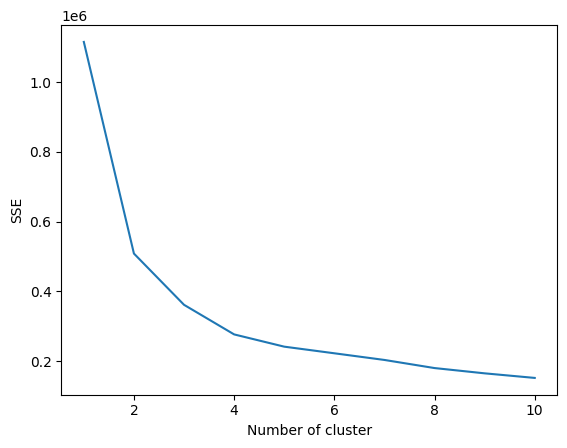

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#Data preprocessing - Standardized RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['r_score', 'f_score', 'm_score']])

#Finding the Best K Value - Elbow Method
sse = {}
for k in range(1, 11):  #Test the K value between 1 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_  # SSE (Sum of Squared Errors)

#Draw a graph of SSE changing with K value
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#Select the optimal K value based on the graph

k_opt = 3  #This value is the inflection point value in the elbow diagram

#Applying K-Means clustering
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = clusters

rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


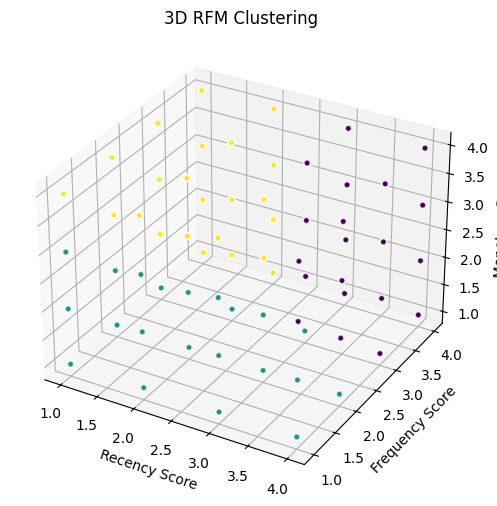

In [16]:
rfm_original = scaler.inverse_transform(rfm_scaled)

#Create a new graph and a 3D subgraph
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#Assign data points to three-dimensional space
xs = rfm_original[:, 0]  # Recency
ys = rfm_original[:, 1]  # Frequency
zs = rfm_original[:, 2]  # Monetary

#Create a 3D scatter plot with colors defined by clustering labels
scatter = ax.scatter(xs, ys, zs, c=clusters, cmap='viridis', marker='o', alpha=0.6, edgecolors='w')

#Set chart titles and axis labels
ax.set_title('3D RFM Clustering')
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')

plt.show()


In [17]:
#Define clustering labels
cluster_labels = {
    0: 'High-Value Customers',
    1: 'Low-Value/Risky Customers',
    2: 'Developing Customers'
}

#Mapping labels to cluster numbers in DataFrame
rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)
rfm_Kmeans = rfm[['to_randomly_generated_account', 'from_totally_fake_account', 'rfm_score', 'Cluster', 'Cluster_Label']]
print(rfm_Kmeans.head(1000).to_string(index=False))
rfm_Kmeans.to_csv('RFM_with_K_means_customer_groups.csv', index=False)

to_randomly_generated_account  from_totally_fake_account rfm_score  Cluster             Cluster_Label
               ACCESSORY_SHOP                       1357       122        1 Low-Value/Risky Customers
               ACCESSORY_SHOP                       1607       333        0      High-Value Customers
               ACCESSORY_SHOP                       1623       133        2      Developing Customers
               ACCESSORY_SHOP                       1828       222        1 Low-Value/Risky Customers
               ACCESSORY_SHOP                       1931       234        2      Developing Customers
               ACCESSORY_SHOP                       2090       223        2      Developing Customers
               ACCESSORY_SHOP                       2274       222        1 Low-Value/Risky Customers
               ACCESSORY_SHOP                       2719       333        0      High-Value Customers
               ACCESSORY_SHOP                       2844       233        2      D